In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### 1) Looking for NaN data in each column

In [4]:
def count_Nans():
    nans = {}
    for i in df.columns:
        nans[i] = df[i].isna().sum()
    return nans

In [5]:
print('Number of NaNs for each attribute:')
print(count_Nans())

Number of NaNs for each attribute:
{'sepal_length': 2, 'sepal_width': 0, 'petal_length': 2, 'petal_width': 3, 'target': 3}


##### 2) Delete lost data in the dataset using `dropna`

In [6]:
df = df.dropna()
print('Number of NaNs after handling of missing data:')
print(count_Nans())

Number of NaNs after handling of missing data:
{'sepal_length': 0, 'sepal_width': 0, 'petal_length': 0, 'petal_width': 0, 'target': 0}


##### 3) Convert Target column to numerical label with `LabelEncoder`

In [7]:
labelEncoder = LabelEncoder()
df['target'] = labelEncoder.fit_transform(df.target.values)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


##### 4) Normalize data with `StandardScaler`

In [8]:
ss = StandardScaler()
ss.fit(df.iloc[:, 0:4])

StandardScaler()

In [9]:
for col in range(len(df.columns) - 1):
    print('{}: mean = {} \t var = {}'.format(df.columns[col], ss.mean_[col], ss.var_[col]))

sepal_length: mean = 5.843333333333334 	 var = 0.6811222222222223
sepal_width: mean = 3.0540000000000003 	 var = 0.18675066666666668
petal_length: mean = 3.758666666666666 	 var = 3.092424888888889
petal_width: mean = 1.1986666666666668 	 var = 0.5785315555555555


In [10]:
df.iloc[:, :-1] = ss.transform(df.iloc[:, :-1])

In [11]:
for col in range(len(df.columns) - 1):
    print('{}: mean = {} \t var = {}'.format(df.columns[col], df.iloc[:, col].mean(), df.iloc[:, col].var()))

sepal_length: mean = -4.736951571734001e-16 	 var = 1.0067114093959733
sepal_width: mean = -6.631732200427602e-16 	 var = 1.006711409395973
petal_length: mean = 3.315866100213801e-16 	 var = 1.0067114093959728
petal_width: mean = -2.842170943040401e-16 	 var = 1.0067114093959733


##### 5) Dimension Reduction with `PCA`

In [12]:
pca = PCA(n_components=2)
pca.fit(df.iloc[:, :-1])
reduced = pca.transform(df.iloc[:, :-1])

##### 6) Scatter plot

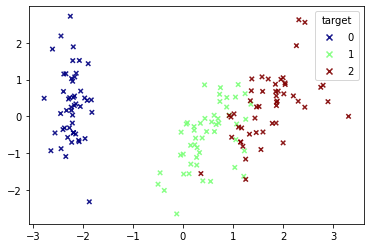

In [13]:
figure = plt.figure()
axes = figure.add_subplot()
scatter = axes.scatter(x=reduced[:, 0], y=reduced[:, 1], c=df.target, s=20, marker='x', cmap='jet', alpha=0.9)
axes.legend(*scatter.legend_elements(), loc="best", title="target")
plt.show()

##### 7) Box plot

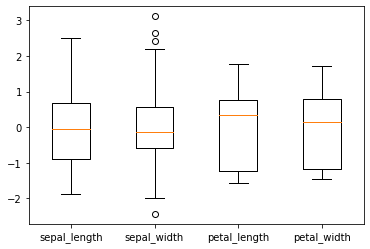

In [14]:
plt.boxplot(df.iloc[:, :-1], labels=df.columns[0:-1])
plt.show()